In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import matplotlib.pyplot as plt
from src.basics.mlp import MLP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X = ((X / 255.) - .5) * 2

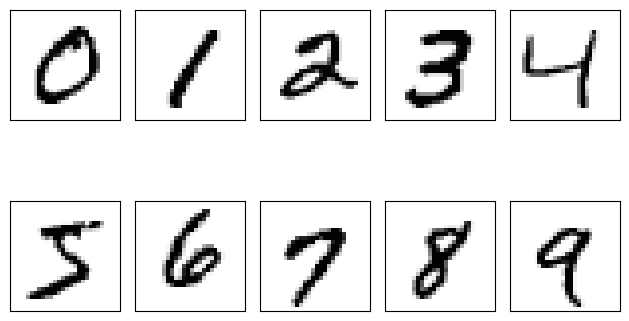

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=10000, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=5000, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [7]:
model = MLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

In [8]:
MLP.fit(model, X_train, y_train, X_valid, y_valid, epochs=20, batch_size=60, learning_rate=0.01)

Epoch 1, Train Loss: 1.4296, Train Accuracy: 0.7061, Val Loss: 1.4222, Val Accuracy: 0.7084
Epoch 2, Train Loss: 0.9223, Train Accuracy: 0.8062, Val Loss: 0.9134, Val Accuracy: 0.8046
Epoch 3, Train Loss: 0.6947, Train Accuracy: 0.8477, Val Loss: 0.6856, Val Accuracy: 0.8514
Epoch 4, Train Loss: 0.5770, Train Accuracy: 0.8635, Val Loss: 0.5689, Val Accuracy: 0.8672
Epoch 5, Train Loss: 0.5035, Train Accuracy: 0.8763, Val Loss: 0.4964, Val Accuracy: 0.8816
Epoch 6, Train Loss: 0.4567, Train Accuracy: 0.8833, Val Loss: 0.4511, Val Accuracy: 0.8878
Epoch 7, Train Loss: 0.4223, Train Accuracy: 0.8904, Val Loss: 0.4178, Val Accuracy: 0.8924
Epoch 8, Train Loss: 0.3974, Train Accuracy: 0.8940, Val Loss: 0.3945, Val Accuracy: 0.8952
Epoch 9, Train Loss: 0.3772, Train Accuracy: 0.8983, Val Loss: 0.3750, Val Accuracy: 0.8984
Epoch 10, Train Loss: 0.3612, Train Accuracy: 0.9009, Val Loss: 0.3598, Val Accuracy: 0.9010
Epoch 11, Train Loss: 0.3478, Train Accuracy: 0.9043, Val Loss: 0.3481, Val Acc

In [9]:
model.evaluate(X_test, y_test)

0.9185